# Microsoft movie production suggestion analysis

## Overview
This project analyzes what type of content,films ,genres that are popular among the viewers and are doing well at the box office.

## Business Problem
Microsoft wants to venture into film production which is a new space to them. Therefore, Microsoft needs  insights on which content and type of films  doing well at the box office so they can hope into the wagon of creating original video content.

## Data understanding
The data used in this analysis are 4 CSV files:
* tmdb.movies.csv
* title.basics.csv
* title.ratings
* tn.movie_budgets.csv



### Loading Data using pandas

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load 'tmdb.movies.csv' as df1
df1=pd.read_csv("C:/Users/user/Downloads/movie data/tmdb.movies.csv",index_col=0)
df1

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,11/19/2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,3/26/2010,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,5/7/2010,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,11/22/1995,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,7/16/2010,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,10/13/2018,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,5/1/2018,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,10/1/2018,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,6/22/2018,Trailer Made,0.0,1


In [3]:
#load 'title.basics.csv' as df2
df2=pd.read_csv("C:/Users/user/Downloads/movie data/title.basics.csv",index_col=0)
df2

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [4]:
# load 'title.ratings.csv' as df3
df3=pd.read_csv("C:/Users/user/Downloads/movie data/title.ratings.csv",index_col=0)
df3

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [5]:
#load 'tn.movie_budgets.csv' as df4
df4=pd.read_csv("C:/Users/user/Downloads/movie data/tn.movie_budgets.csv",index_col=0)
df4

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,31-Dec-18,Red 11,"$7,000",$0,$0
79,2-Apr-99,Following,"$6,000","$48,482","$240,495"
80,13-Jul-05,Return to the Land of Wonders,"$5,000","$1,338","$1,338"


### Data cleaning


In [6]:
#checking df1 information to get familiar with our data
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


There are 9 columns and no column has missing values. 
```Popularity``` and  ```vote_average``` have float data type, ```id```and  ```vote_count``` have interger data types.
The rest have string data type

In [7]:
#COLUMN NAMES
df1.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [8]:
#setting id as the index column
df1=df1.set_index("id")
df1.head()

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,,,
12444,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,11/19/2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,3/26/2010,How to Train Your Dragon,7.7,7610
10138,"[12, 28, 878]",en,Iron Man 2,28.515,5/7/2010,Iron Man 2,6.8,12368
862,"[16, 35, 10751]",en,Toy Story,28.005,11/22/1995,Toy Story,7.9,10174
27205,"[28, 878, 12]",en,Inception,27.920,7/16/2010,Inception,8.3,22186


In [9]:
#checking for duplicates
df1.duplicated().value_counts()

False    25497
True      1020
dtype: int64

There are duplicates which are indicated by 'True' value and they should be removed.

In [10]:
#print out all the duplicates next to each other
df1[df1.duplicated(keep=False)].sort_values(by="id")

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,,,
129,"[16, 10751, 14]",ja,千と千尋の神隠し,32.043,9/20/2002,Spirited Away,8.5,7424
129,"[16, 10751, 14]",ja,千と千尋の神隠し,32.043,9/20/2002,Spirited Away,8.5,7424
239,"[35, 10749]",en,Some Like It Hot,14.200,3/18/1959,Some Like It Hot,8.2,1562
239,"[35, 10749]",en,Some Like It Hot,14.200,3/18/1959,Some Like It Hot,8.2,1562
280,"[28, 53, 878]",en,Terminator 2: Judgment Day,24.604,7/3/1991,Terminator 2: Judgment Day,7.9,6682
...,...,...,...,...,...,...,...,...
560717,[27],en,Requiem,0.600,1/1/2015,Requiem,5.0,1
564441,[35],en,Adopting Trouble,0.600,4/8/2016,Adopting Trouble,4.0,2
564441,[35],en,Adopting Trouble,0.600,4/8/2016,Adopting Trouble,4.0,2


In [11]:
#dropping all duplicates
df1=df1.drop_duplicates()

In [12]:
#RECHECK IF THERE ANY DUPLICATES LEFT
df1.duplicated().value_counts()

False    25497
dtype: int64

In [13]:
#changed 'release_date' from object to datetime data type
df1["release_date"]=df1["release_date"].astype("datetime64")
df1["release_date"]

id
12444    2010-11-19
10191    2010-03-26
10138    2010-05-07
862      1995-11-22
27205    2010-07-16
            ...    
488143   2018-10-13
485975   2018-05-01
381231   2018-10-01
366854   2018-06-22
309885   2018-10-05
Name: release_date, Length: 25497, dtype: datetime64[ns]

In [14]:
df1["original_language"].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [15]:
df1["original_language"].value_counts()

en    22384
fr      483
es      439
ru      295
ja      244
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: original_language, Length: 76, dtype: int64

In [16]:
df1["original_title"].unique()

array(['Harry Potter and the Deathly Hallows: Part 1',
       'How to Train Your Dragon', 'Iron Man 2', ..., 'The Last One',
       'Trailer Made', 'The Church'], dtype=object)

In [17]:
df1["original_title"].value_counts()

Home                          6
Lucky                         5
Eden                          5
Aftermath                     5
Truth or Dare                 5
                             ..
Heebie Jeebies                1
The Class of '92              1
Just Crazy Enough             1
Любовь в большом городе  3    1
The Church                    1
Name: original_title, Length: 24832, dtype: int64

#### **Merging datasets**

In [18]:
#combined df2 and df3 using tconst column
joint_df=pd.merge(df2,df3, on='tconst', how='inner')
joint_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [19]:
# checking out 'joint_df' to understand the data
joint_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


There 7 columns and there are columns with missing values  ```runtime_minutes``` and ```genres```.<br>
```start_year``` and ```numvotes``` have integer data types while ```runtime_minutes``` and ```averagerating``` have float data types.The rest have
string data types.



In [20]:
joint_df.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [21]:
#check if there are duplicates
joint_df.duplicated().value_counts()

False    73856
dtype: int64

The 'joint_df' does not have duplicates

#### **Dealing with missing data**

In [22]:
#checking how many missing values are in  runtime_minutes column
joint_df["runtime_minutes"].isna().value_counts()

False    66236
True      7620
Name: runtime_minutes, dtype: int64

In [23]:
#checking how many missing values are in  genres column
joint_df["genres"].isna().value_counts()

False    73052
True       804
Name: genres, dtype: int64

The ```runtime_minutes``` and ```genres``` columns are needed in the analysis so the best way to deal with the missing data is dropping the affected rows rather than dropping the whole column or filling it with some values.The size of dataset is suitable for dropping rows as it is quite huge.

In [24]:
#drop the affected rows
joint_df=joint_df.dropna()

In [25]:
#confirm if missing values still exist
joint_df.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [26]:
joint_df.shape

(65720, 7)

In [27]:
joint_df["runtime_minutes"].value_counts()

90.0     4718
80.0     2142
85.0     2048
100.0    1954
95.0     1919
         ... 
202.0       1
319.0       1
350.0       1
476.0       1
261.0       1
Name: runtime_minutes, Length: 289, dtype: int64

In [28]:
joint_df["genres"].value_counts()

Drama                        10189
Documentary                   9149
Comedy                        4604
Comedy,Drama                  2451
Horror                        2232
                             ...  
Family,Horror,Romance            1
Action,History,Horror            1
Fantasy,History,Mystery          1
Adventure,Crime,Romance          1
Documentary,Family,Sci-Fi        1
Name: genres, Length: 906, dtype: int64

In [29]:
#getting familiar with the df4 dataframe
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


There are 5 columns and no column has any missing values and all columns are string data type which should not be the case as all columns with numbers should be intergers

In [30]:
df4.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [31]:
#checking for duplicates
df4.duplicated().value_counts()

False    5782
dtype: int64

The dataset above does not have duplicates.

#### **Changing columns to appropriate data types**

In [32]:
df4.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [33]:
#checking if values in 'production_budget' ,'domestic_gross' and 'worldwide_gross' columns are in dollars
def check(df,column):
    for values in df[column]:
        if "$" not in values:
            print("This is not a dollar")
            
            
check(df4,"production_budget")
check(df4,"domestic_gross")
check(df4,"worldwide_gross")

All of the above columns are in dollars

In [34]:
#Removing the '$' sign
df4['domestic_gross'] = df4['domestic_gross'].map(lambda x: x.lstrip('$'))
df4['production_budget'] = df4['production_budget'].map(lambda x: x.lstrip('$'))
df4['worldwide_gross'] = df4['worldwide_gross'].map(lambda x: x.lstrip('$'))


In [35]:
#Removing the commas from the number values
df4["domestic_gross"].replace(',','', regex=True, inplace=True)
df4["production_budget"].replace(',','', regex=True, inplace=True)
df4["worldwide_gross"].replace(',','', regex=True, inplace=True)

In [36]:
#Rechecking the dataframe
df4.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,18-Dec-09,Avatar,425000000,760507625,2776345279
2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350
4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963
5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [37]:
#converting the three columns to interger data type
df4['production_budget'] = df4['production_budget'].astype('int64')
df4['domestic_gross'] =df4['domestic_gross'].astype('int64')
df4['worldwide_gross']=df4['worldwide_gross'].astype('int64')
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [38]:
#changing 'release_date' column to datetime format
df4['release_date']=df4['release_date'].astype("datetime64")
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 271.0+ KB


### Answering the questions

Now that the data is clean and ready for analysis.<BR>
    
**1. Which language has the most votes among movie watchers?**


In [39]:
df=df1.groupby(["original_language"])[["vote_count"]].sum()
high_rated=df.nlargest(10,"vote_count")
high_rated.head()

,vote_count
original_language,
en,4314730
fr,69634
ja,40360
es,26469
it,14846


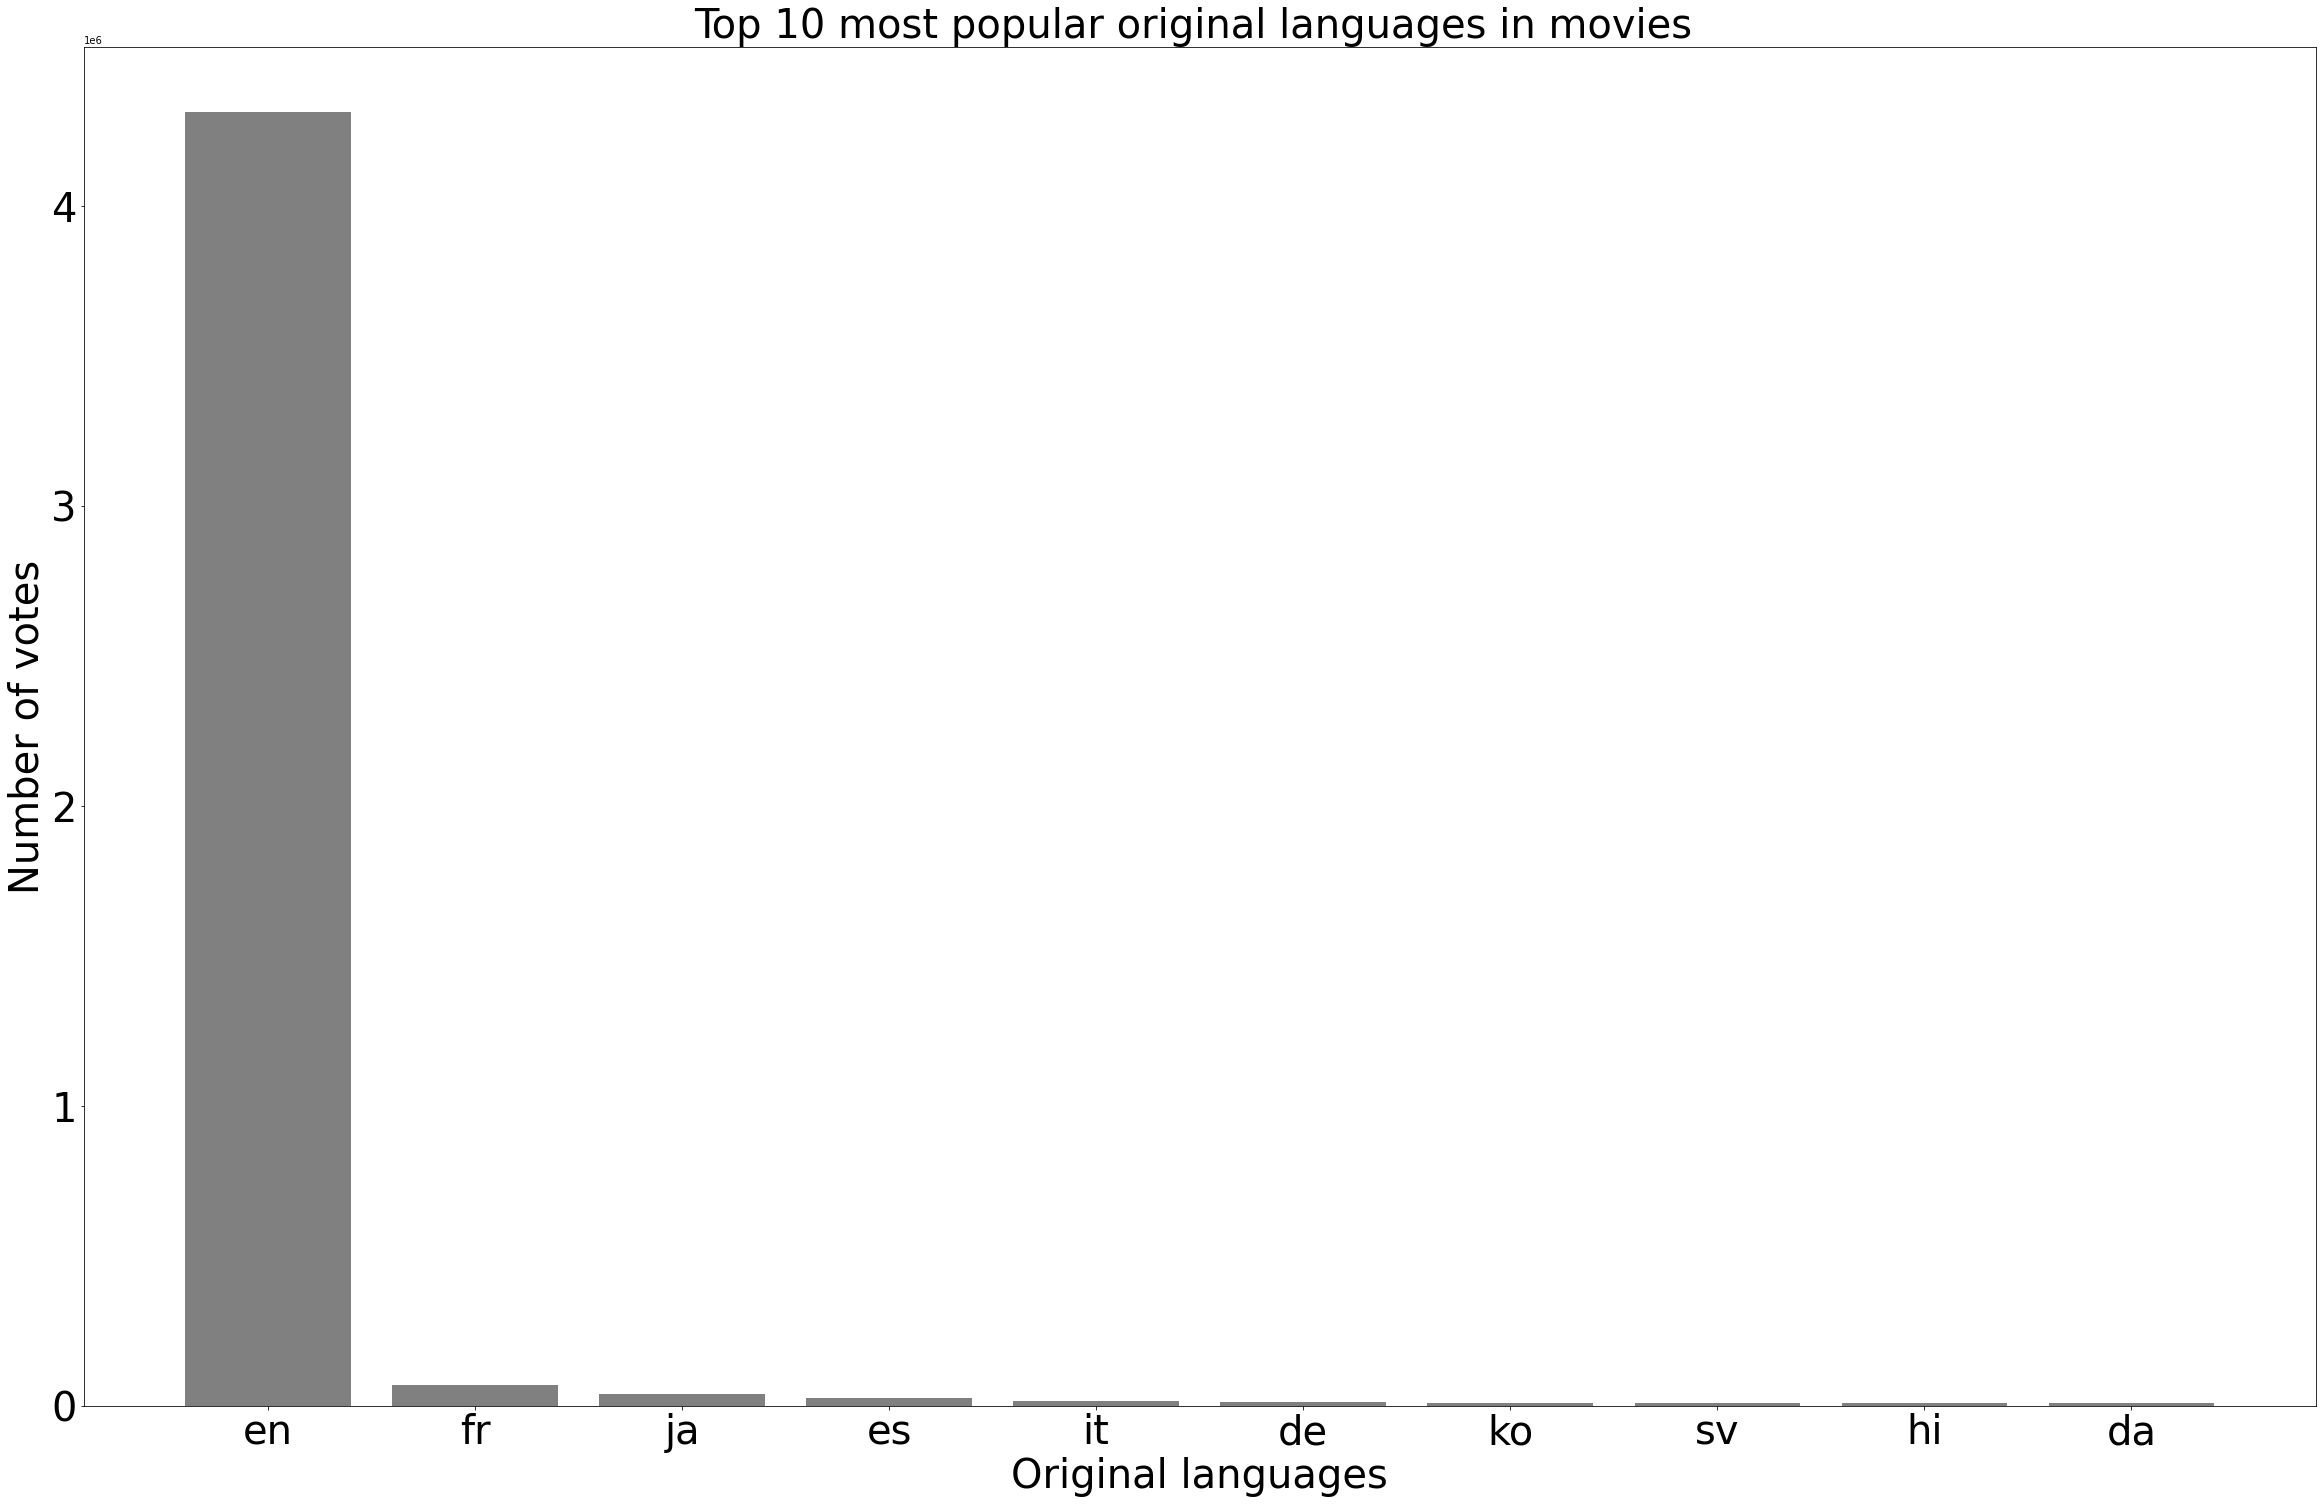

In [40]:
fig, ax = plt.subplots(figsize=(40,25))
ax.bar(high_rated.index,high_rated["vote_count"]  ,color="gray")
ax.set_title("Top 10 most popular original languages in movies ",fontsize=40)
ax.set_xlabel("Original languages",fontsize=40)
ax.set_ylabel("Number of votes",fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.savefig("popular original languages in movies1.png")

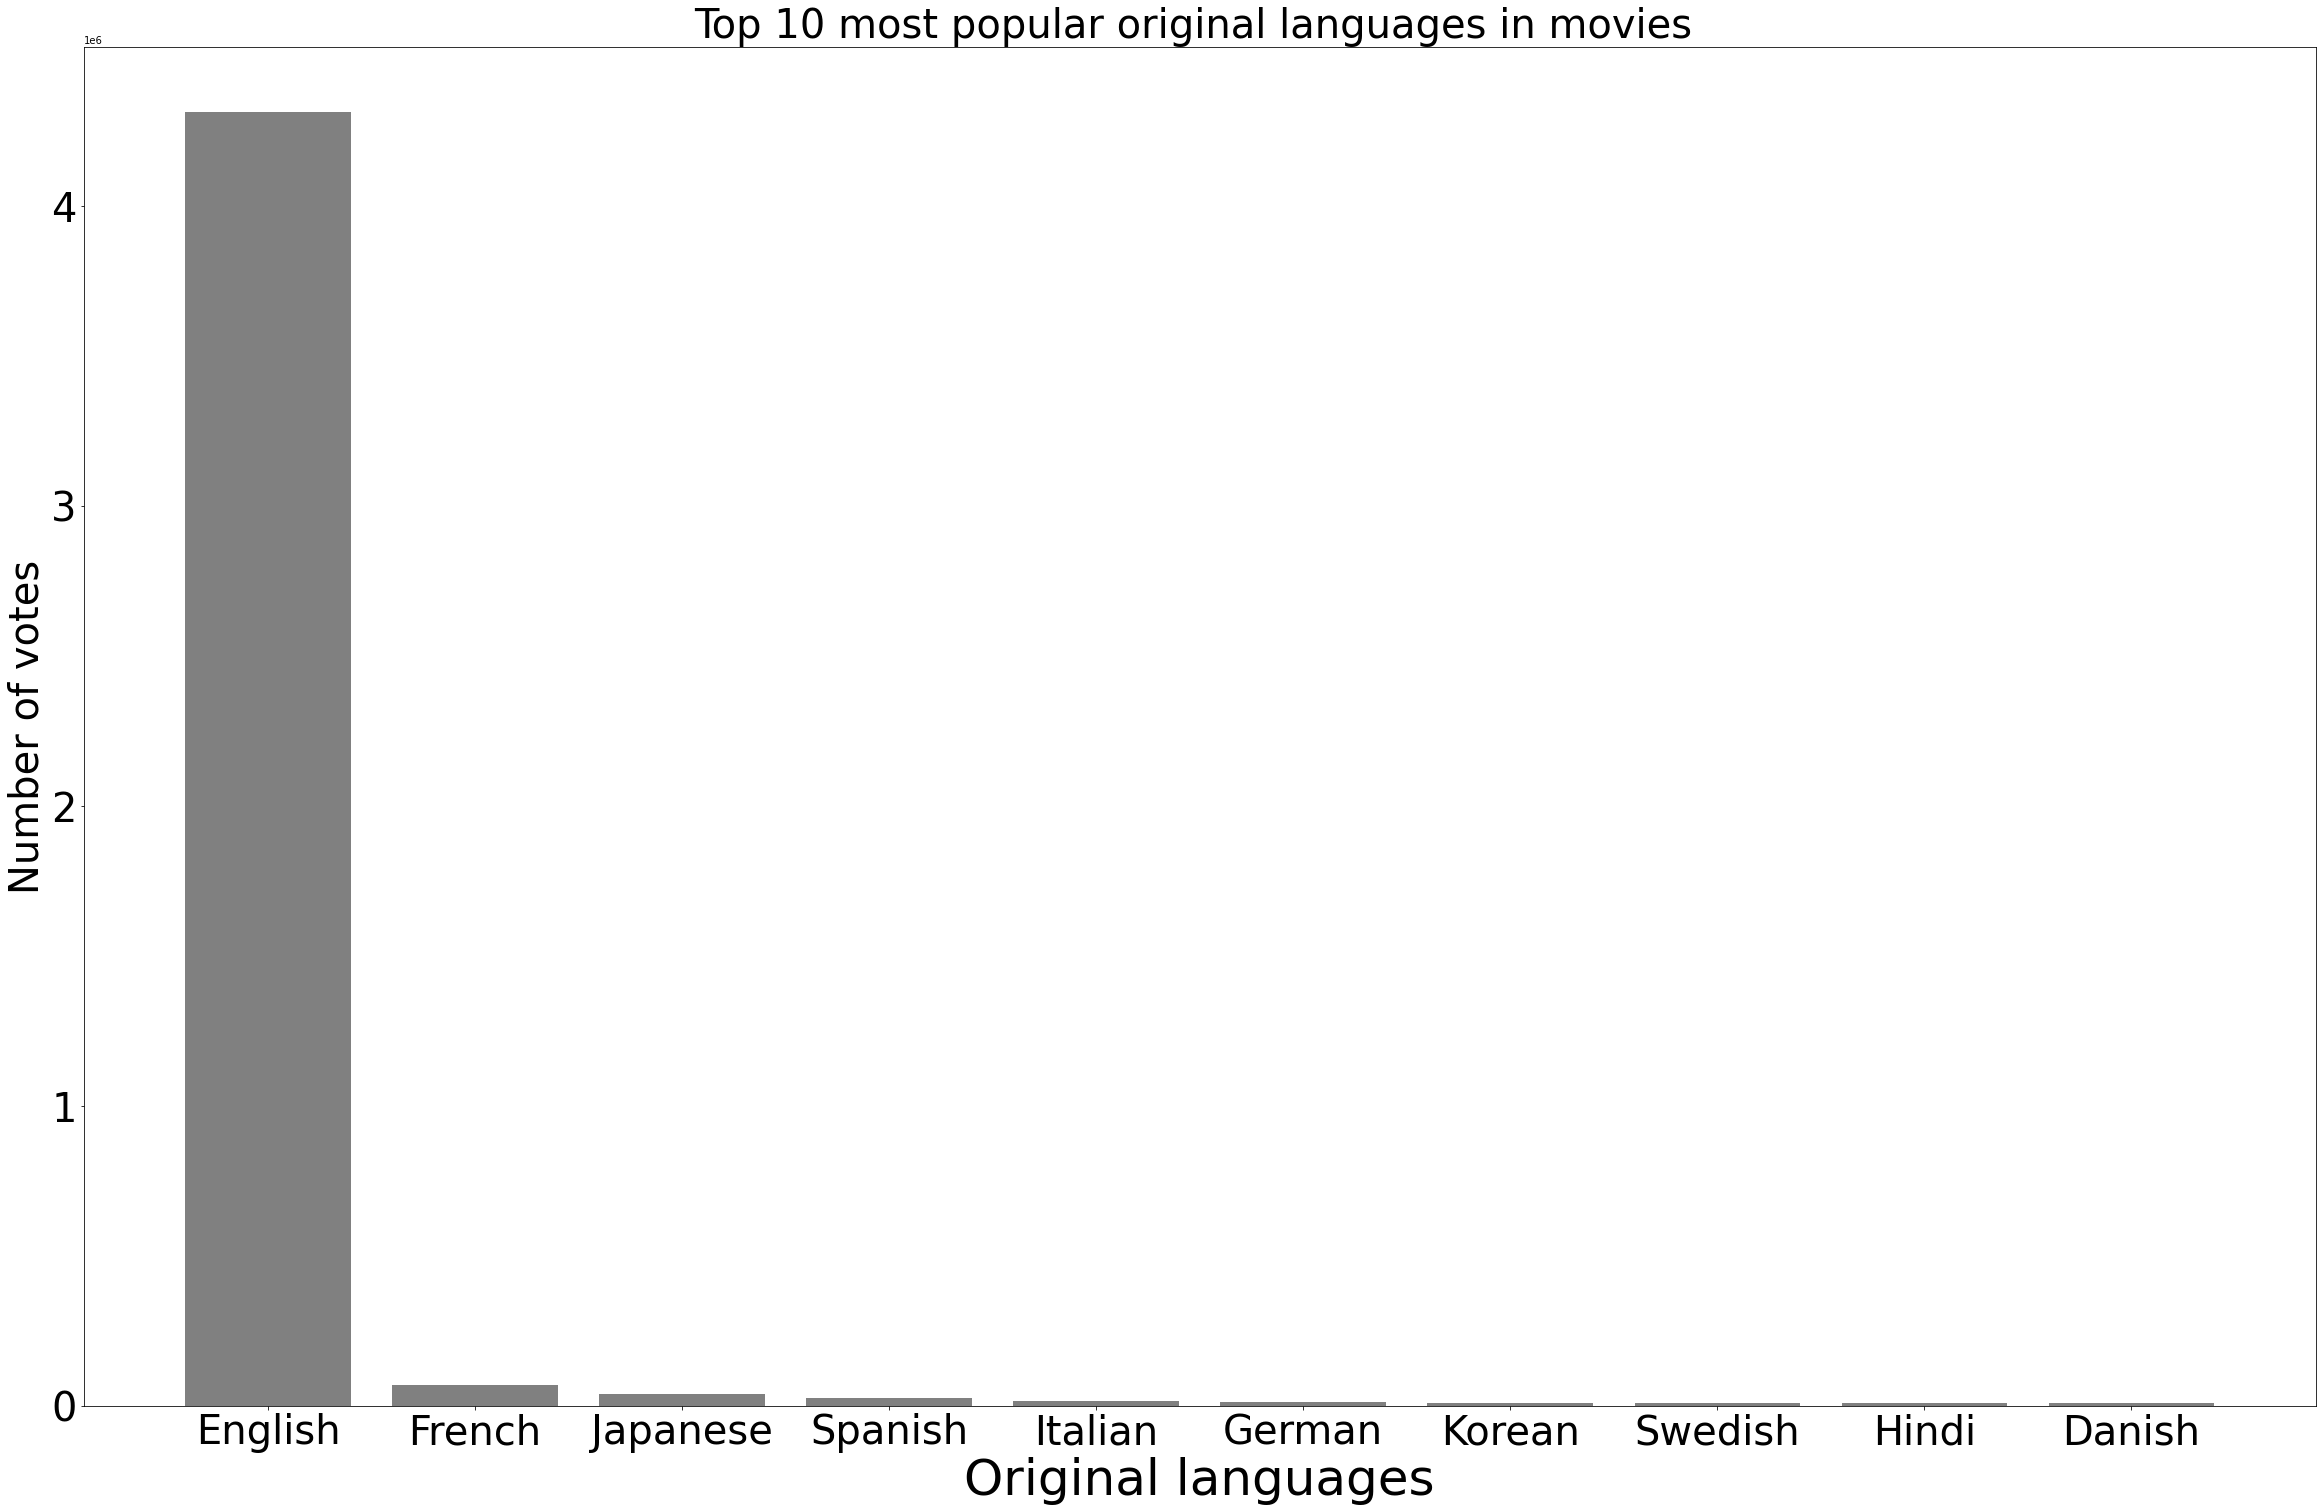

In [41]:
fig, ax = plt.subplots(figsize=(40,25))
x=["English","French","Japanese","Spanish","Italian","German","Korean","Swedish"
  ,"Hindi","Danish"]
ax.bar(x,high_rated["vote_count"] ,color="gray")
ax.set_title("Top 10 most popular original languages in movies ",fontsize=40)
ax.set_xlabel("Original languages",fontsize=50)
ax.set_ylabel("Number of votes",fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.savefig("popular original languages in movies2.png")

The most prefered language by viewers is **English** as it has the most number of votes compared to any other language.

**2. Is there a relationship between runtime and number of votes ?**<br>
_(Do viewers prefer long or short movies?)_

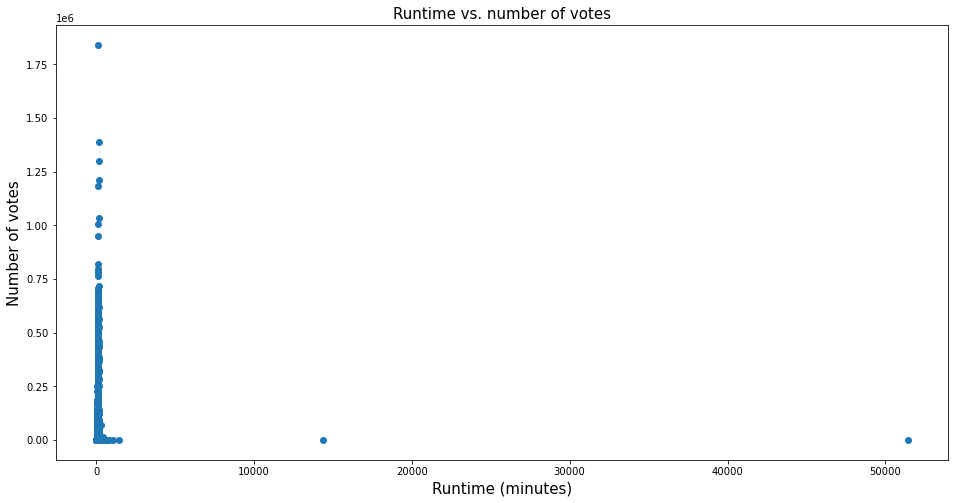

In [42]:
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(joint_df["runtime_minutes"],joint_df["numvotes"])
ax.set_xlabel("Runtime (minutes)",fontsize=15)
ax.set_ylabel("Number of votes",fontsize=15)
ax.set_title("Runtime vs. number of votes",fontsize=15)
fig.savefig("Runtime vs. number of votes3.png")

The data seems to be populated at one end , there are also two outliers which should be looked into more closely.

In [43]:
joint_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [44]:
#Closer look at the outliers
joint_df[joint_df["runtime_minutes"] >1000].sample(2, random_state=1)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,"Comedy,History",8.6,5
tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17


In [45]:
#Obtaining a copy of the dataframe without ouliers
question_2_df = joint_df[joint_df["runtime_minutes"] <1000].copy()
question_2_df


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...
tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6


In [46]:
question_2_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65716.000000,65716.000000,65716.000000,6.571600e+04
mean,2014.258172,93.697806,6.320850,3.954910e+03
std,2.600101,24.430955,1.458851,3.208920e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,808.000000,10.000000,1.841066e+06


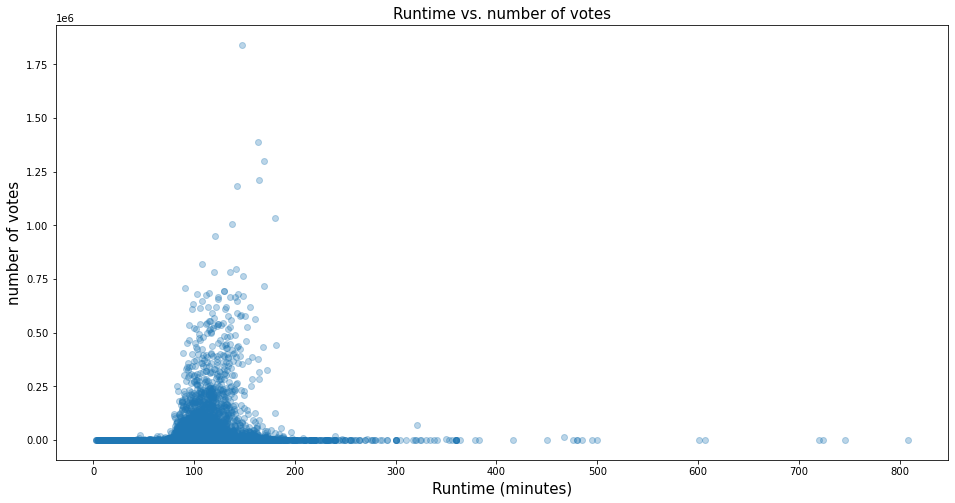

In [47]:
#Repeating the procedure with a dataframe without the outliers
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(question_2_df["runtime_minutes"],question_2_df["numvotes"],alpha=0.3)
ax.set_xlabel("Runtime (minutes)",fontsize=15)
ax.set_ylabel("number of votes",fontsize=15)
ax.set_title("Runtime vs. number of votes",fontsize=15)
fig.savefig("Runtime vs. number of votes4.png")

Films with runtime around 90-200 are the ones that have the most number of votes compared to very long or short films.

**3.Which genres are the most popular?**

In [48]:
df=joint_df.groupby(['genres'])[['averagerating']].sum()
high_rated=df.nlargest(20,'averagerating')
high_rated.head()

,averagerating
genres,
Documentary,66486.2
Drama,66083.6
Comedy,26636.4
"Comedy,Drama",15610.2
Horror,10458.2


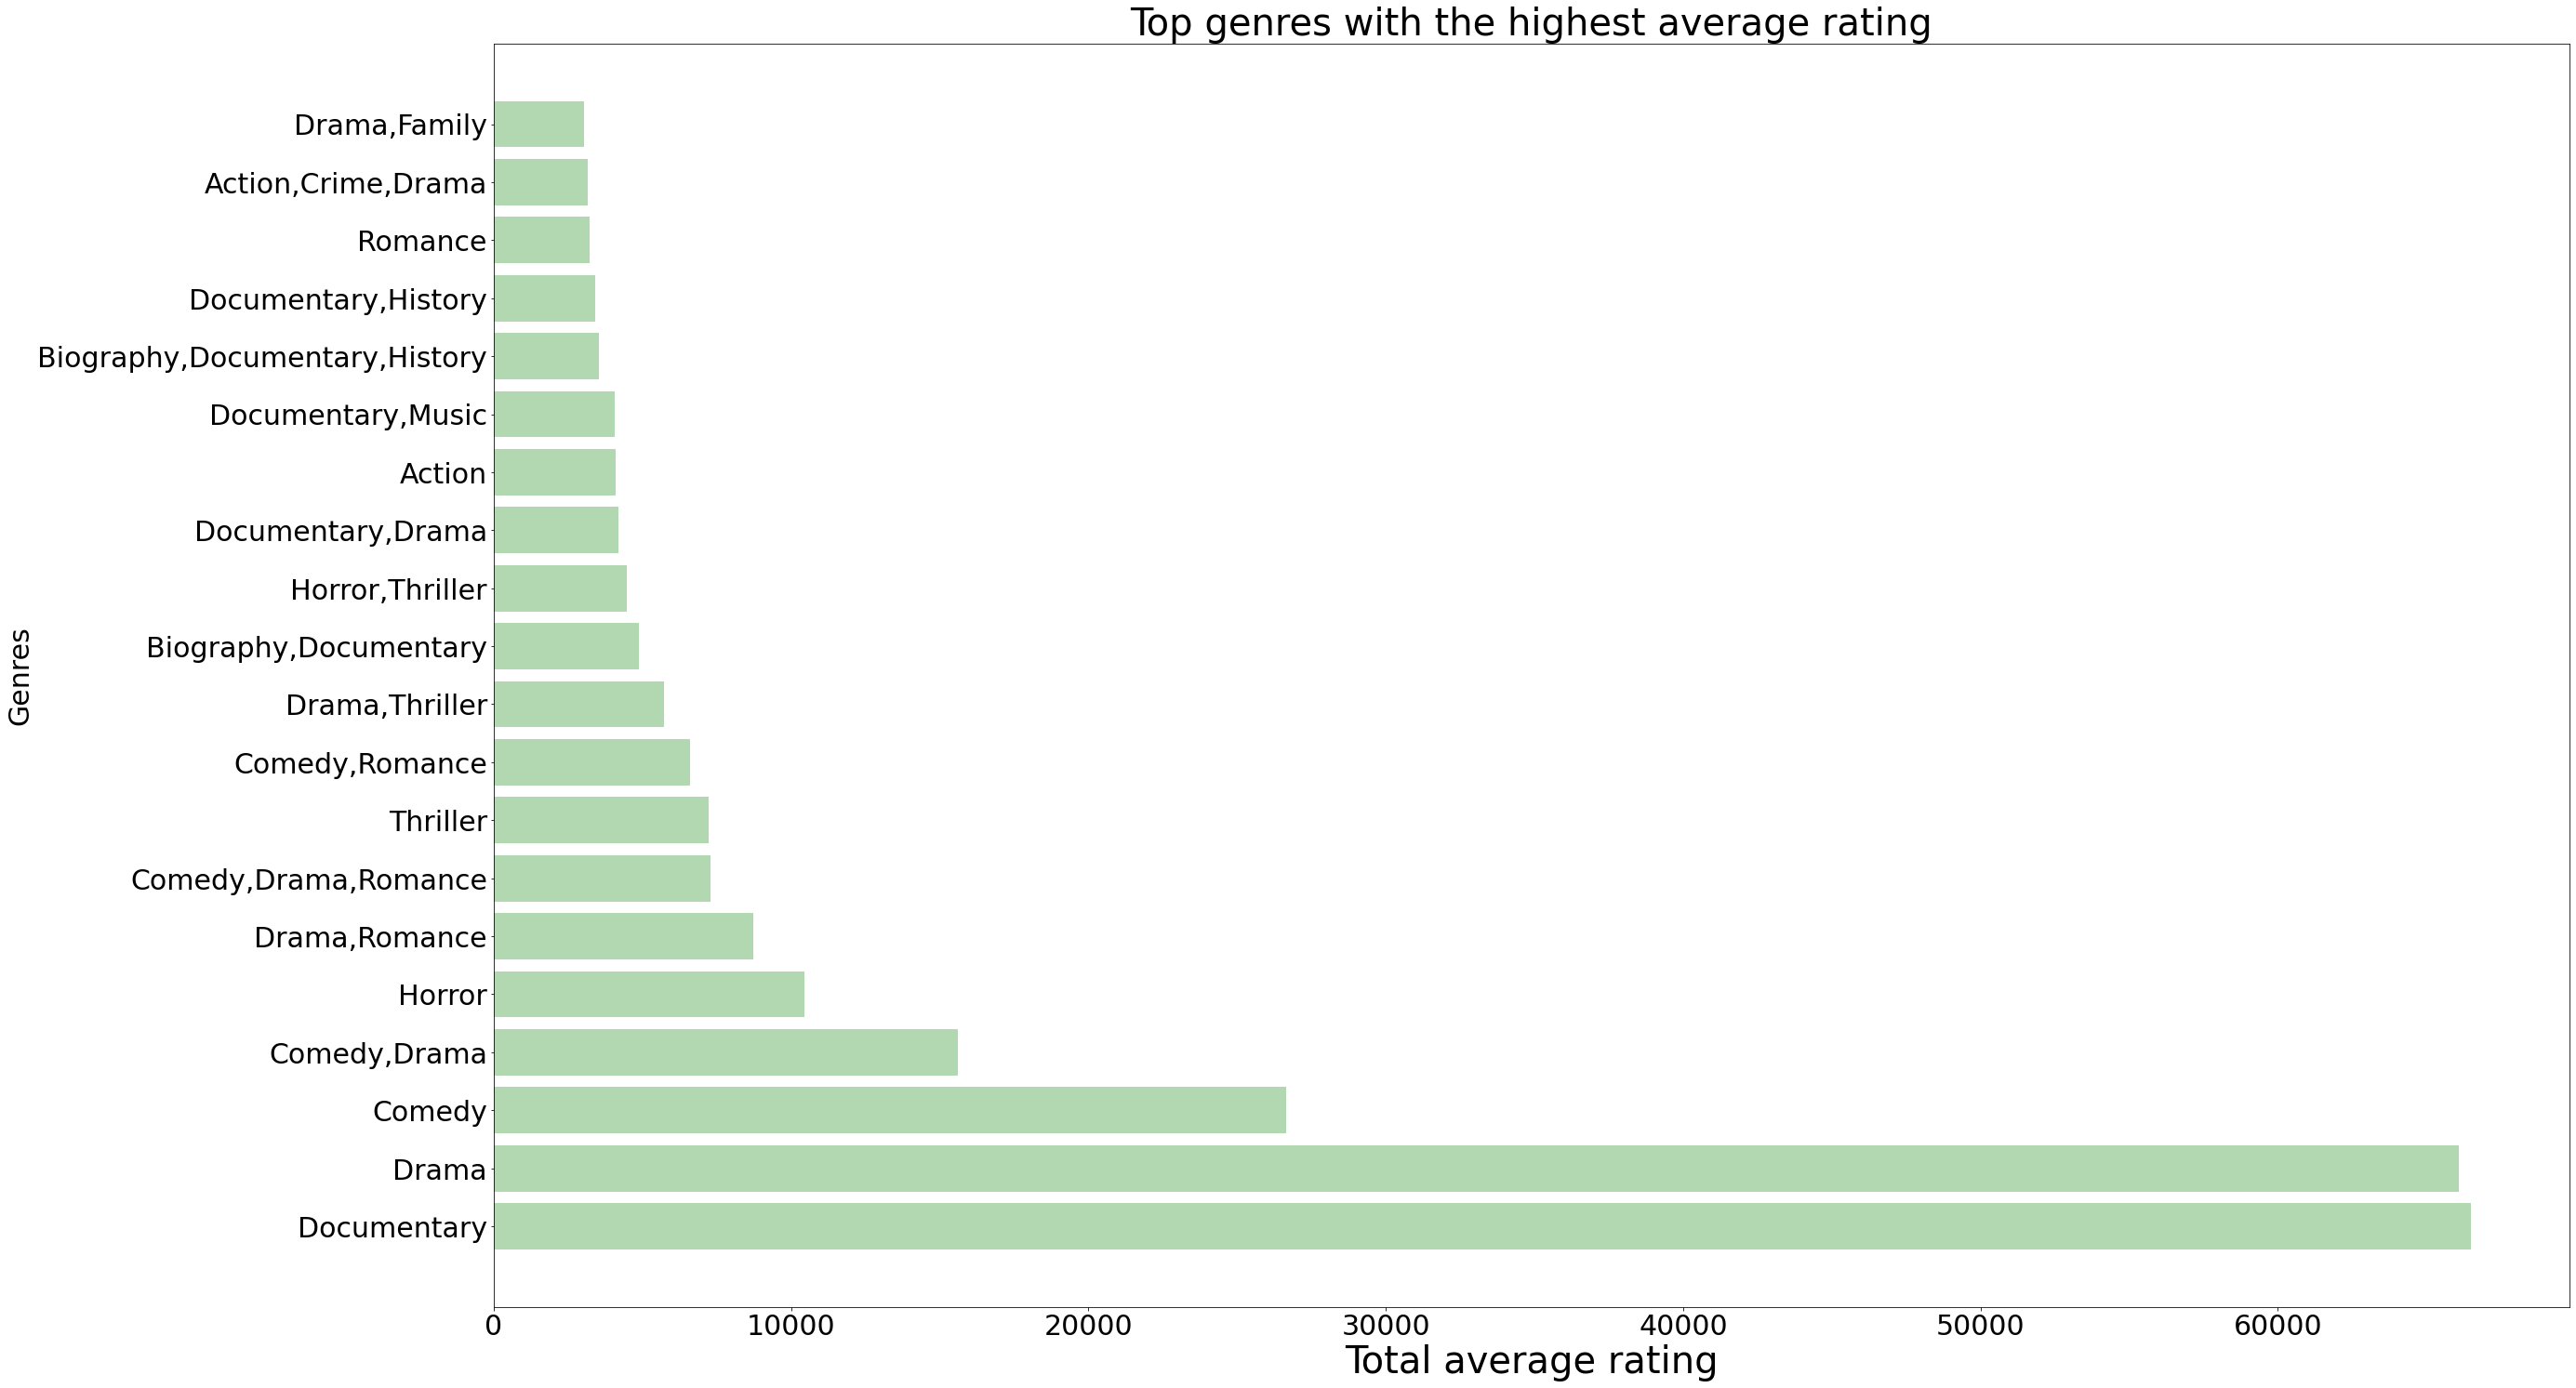

In [49]:
fig, ax = plt.subplots(figsize=(40,25))
ax.barh(high_rated.index,high_rated["averagerating"] ,alpha=0.3 ,color="green")
ax.set_title("Top genres with the highest average rating",fontsize=40)
ax.set_xlabel("Total average rating",fontsize=40)
ax.set_ylabel("Genres",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("Top genres with the highest average rating5.png")

```Documentary```  is the genre most preferred by viewers which is closely followed by ```Drama``` then ```Comedy```

**4. Investigating the relationship between average rating and number of votes?**

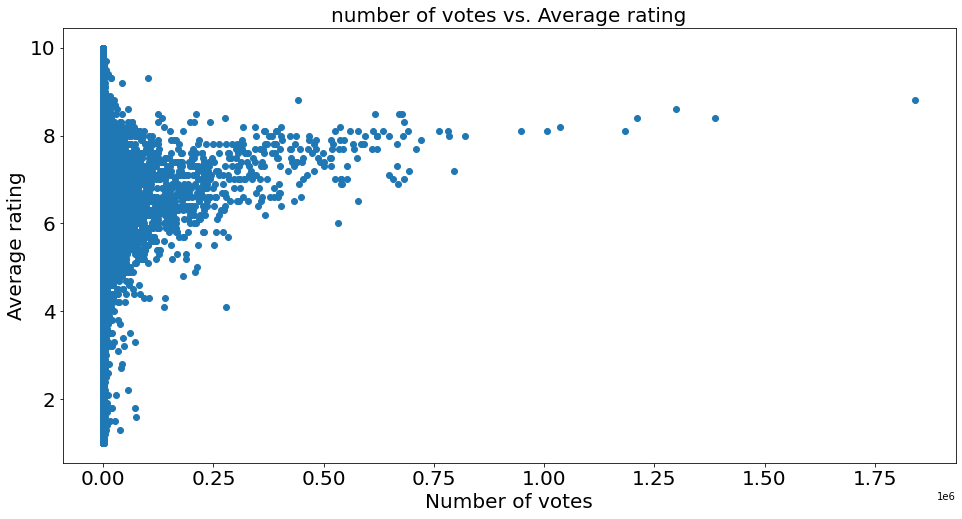

In [50]:

fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(joint_df["numvotes"],joint_df["averagerating"])
ax.set_xlabel("Number of votes",fontsize=20)
ax.set_ylabel("Average rating",fontsize=20)
ax.set_title("number of votes vs. Average rating",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.savefig("number of votes vs. Average rating6.png")

Generally ,high rating is associated with high number of votes but there is an unusual pattern as there are films with very low vote count but the average rating is quite high.This shows there is a gap and something worth looking into.

In [51]:
joint_df.corr()["numvotes"]

start_year        -0.029532
runtime_minutes    0.012428
averagerating      0.048756
numvotes           1.000000
Name: numvotes, dtype: float64

In [52]:
joint_df[joint_df["averagerating"] >9.9].sample(10, random_state=1)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5
tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6
tt7227500,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,70.0,"Documentary,History",10.0,6
tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5
tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7
tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5
tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5


In [53]:
joint_df[joint_df["averagerating"] <5].sample(10, random_state=1)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt2302150,Soldier of Destiny,Soldier of Destiny,2012,90.0,"Action,Drama",4.5,71
tt2554842,Girl in Woods,Girl in Woods,2016,87.0,"Drama,Horror,Thriller",3.4,423
tt3657672,Yuchi Gong: The Door God,Yu Chigong,2012,91.0,"Action,Adventure,Drama",4.9,8
tt2118694,The Dark Sleep,The Dark Sleep,2012,80.0,Horror,4.8,64
tt2391706,Thappana,Thappana,2012,130.0,"Action,Drama",4.7,242
tt3097956,Chasing Valentine,Chasing Valentine,2015,87.0,"Drama,Thriller",4.5,169
tt4544696,My Honor Was Loyalty,My Honor Was Loyalty,2016,95.0,"Drama,War",4.3,839
tt4178118,Tunnel,Teo-neol 3D,2014,86.0,Horror,4.9,164
tt6136576,Motel Ghoo,Motel Ghoo,2012,90.0,Comedy,3.1,9


The above random samples of the data shows that there is an unsual trend between average rating and number of votes.

**5. Is there a correlation between production budget and gross income?**<br>
_(Does more money spent on production mean more income?)_

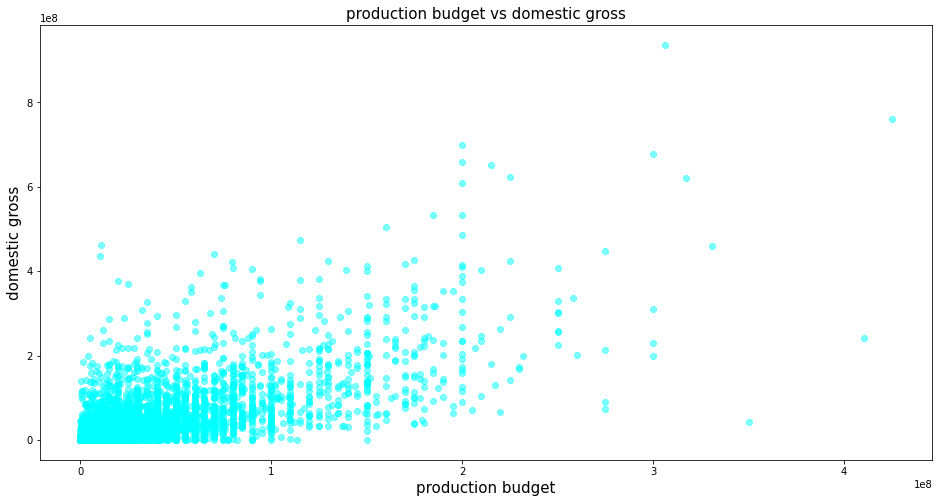

In [54]:
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(df4["production_budget"],df4["domestic_gross"],alpha=0.5,
    color="cyan")
    

ax.set_xlabel("production budget",fontsize=15)
ax.set_ylabel("domestic gross",fontsize=15)
ax.set_title("production budget vs domestic gross",fontsize=15)
fig.savefig("production budget vs domestic gross7.png")

The data is a bit skewed as there low production bugdets with high domestic gross and vise versa.This means high production cost does not neccesarily mean high domestic gross.<br>
In addition,there are movies with domestic gross of 0,definitely something to look into.

In [55]:
df4[df4["worldwide_gross"] <1].sample(20, random_state=1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
65,2010-12-31,Anderson's Cross,300000,0,0
95,2015-03-17,Closure,100000,0,0
16,2013-10-08,Zombie Hunter,1000000,0,0
63,2012-12-31,The Helpers,4000000,0,0
83,2012-08-28,Below Zero,1200000,0,0
66,2016-01-19,Eden,2300000,0,0
12,2012-10-09,Truth or Die,1000000,0,0
90,2014-11-21,Reach Me,5000000,0,0
72,2010-12-31,Drones,500000,0,0


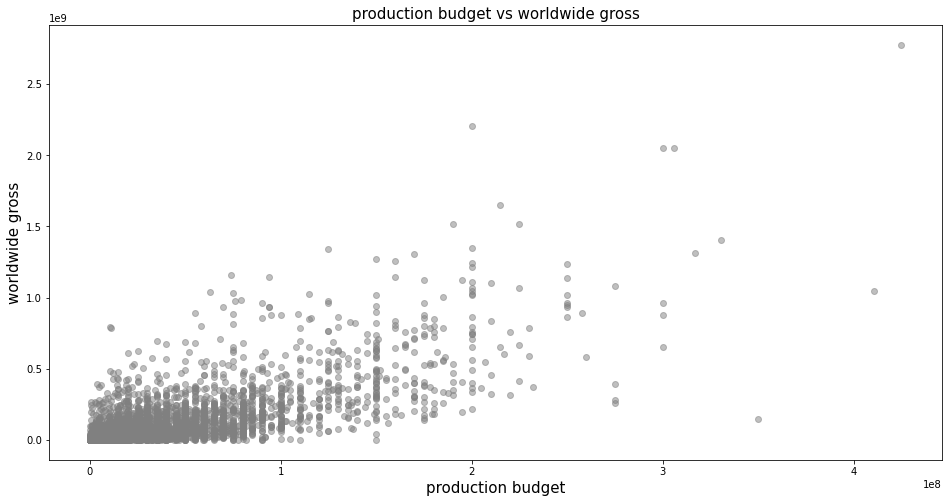

In [56]:
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(df4["production_budget"],df4["worldwide_gross"],alpha=0.5,
    color="gray")
    

ax.set_xlabel("production budget",fontsize=15)
ax.set_ylabel("worldwide gross",fontsize=15)
ax.set_title("production budget vs worldwide gross",fontsize=15)
fig.savefig("production budget vs worldwide gross8.png")

In [57]:
df4.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09



Compared with ```domestic gross vs production bugdet``` scatter plot,this is a bit less spread out.Also there are zero values in worldwide gross.

In [58]:
#Checking out the correlation
df4.corr()['production_budget'].sort_values()

domestic_gross       0.685682
worldwide_gross      0.748306
production_budget    1.000000
Name: production_budget, dtype: float64

The correlation between ```production bugdet vs domestic gross``` and ```production bugdet vs worldwide gross``` is positive.However, the correlation between ```production bugdet vs worldwide gross``` is stronger than ```production bugdet vs domestic gross```